<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-Notebook" data-toc-modified-id="Setup-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup Notebook</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Download Data</a></span><ul class="toc-item"><li><span><a href="#Download-&amp;-Shell-Script-to-Download-Census-Data" data-toc-modified-id="Download-&amp;-Shell-Script-to-Download-Census-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download &amp; Shell Script to Download Census Data</a></span></li><li><span><a href="#Unzip-Census-Data" data-toc-modified-id="Unzip-Census-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Unzip Census Data</a></span></li><li><span><a href="#Open-Census-Data-as-Pandas-Dataframes" data-toc-modified-id="Open-Census-Data-as-Pandas-Dataframes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Open Census Data as Pandas Dataframes</a></span></li><li><span><a href="#Drop-Unnecessary-Dataframe-Columns-and-Merge" data-toc-modified-id="Drop-Unnecessary-Dataframe-Columns-and-Merge-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Drop Unnecessary Dataframe Columns and Merge</a></span></li><li><span><a href="#Get-NYC-Zipcode-Shapefiles" data-toc-modified-id="Get-NYC-Zipcode-Shapefiles-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Get NYC Zipcode Shapefiles</a></span></li><li><span><a href="#Select-Data-For-Only-NYC" data-toc-modified-id="Select-Data-For-Only-NYC-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Select Data For Only NYC</a></span></li></ul></li><li><span><a href="#Visual-Exploratory-Analysis" data-toc-modified-id="Visual-Exploratory-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visual Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Create-New-Dataframe-With-Time-Series-for-Each-Zipcode" data-toc-modified-id="Create-New-Dataframe-With-Time-Series-for-Each-Zipcode-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create New Dataframe With Time Series for Each Zipcode</a></span></li><li><span><a href="#Plot-each-Zipcode-Time-Series-of-New-Establishments" data-toc-modified-id="Plot-each-Zipcode-Time-Series-of-New-Establishments-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot each Zipcode Time Series of New Establishments</a></span></li><li><span><a href="#Plot-Normalized-Time-Series-for-Each-Zipcode" data-toc-modified-id="Plot-Normalized-Time-Series-for-Each-Zipcode-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot Normalized Time Series for Each Zipcode</a></span></li></ul></li><li><span><a href="#Cluster-Number-of-Establishments-Using-K-Means" data-toc-modified-id="Cluster-Number-of-Establishments-Using-K-Means-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster Number of Establishments Using K Means</a></span><ul class="toc-item"><li><span><a href="#Seed-for-reproducibility" data-toc-modified-id="Seed-for-reproducibility-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Seed for reproducibility</a></span></li><li><span><a href="#Use-Elbow-Method-to-determine-how-many-clusters-to-use" data-toc-modified-id="Use-Elbow-Method-to-determine-how-many-clusters-to-use-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Use Elbow Method to determine how many clusters to use</a></span></li><li><span><a href="#Seed-the-data-for-reproducibility-&amp;-cluster-the-data" data-toc-modified-id="Seed-the-data-for-reproducibility-&amp;-cluster-the-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Seed the data for reproducibility &amp; cluster the data</a></span></li><li><span><a href="#Plot-each-cluster-over-time-to-see-each-cluster's-pattern-of-change" data-toc-modified-id="Plot-each-cluster-over-time-to-see-each-cluster's-pattern-of-change-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plot each cluster over time to see each cluster's pattern of change</a></span></li><li><span><a href="#Plot-the-mean-of-establishments-by-cluster-group" data-toc-modified-id="Plot-the-mean-of-establishments-by-cluster-group-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Plot the mean of establishments by cluster group</a></span></li></ul></li><li><span><a href="#Cluster-Number-of-Establishments-Using-Another-Algorithm" data-toc-modified-id="Cluster-Number-of-Establishments-Using-Another-Algorithm-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cluster Number of Establishments Using Another Algorithm</a></span><ul class="toc-item"><li><span><a href="#Use-Agglomerative-Clustering" data-toc-modified-id="Use-Agglomerative-Clustering-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Use Agglomerative Clustering</a></span></li><li><span><a href="#Plot-the-centers-of-each-cluster" data-toc-modified-id="Plot-the-centers-of-each-cluster-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot the centers of each cluster</a></span></li></ul></li><li><span><a href="#Compare-Algorithms" data-toc-modified-id="Compare-Algorithms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Algorithms</a></span></li><li><span><a href="#Overlay-Clusters-Onto-Map-of-NYC" data-toc-modified-id="Overlay-Clusters-Onto-Map-of-NYC-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Overlay Clusters Onto Map of NYC</a></span></li></ul></div>

## Setup Notebook

In [341]:
from __future__ import print_function
import numpy as np
import pandas as pd
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import os, urllib, zipfile
import sklearn.cluster
from sklearn import mixture
from PIL import Image
import scipy
from scipy.cluster.vq import kmeans2
from mpl_toolkits.mplot3d import Axes3D
import time
import pylab as pl
from IPython.display import display, clear_output
import time
from scipy.spatial.distance import cdist
import pysal


%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Download Data

### Download & Shell Script to Download Census Data

In [6]:
os.system('chmod +x download.sh')
os.system('./download.sh');

### Unzip Census Data

In [7]:
url = 'https://raw.githubusercontent.com/python/cpython/2.7/Lib/zipfile.py'
fileName = 'zipfile.py'
urllib.request.urlretrieve(url, fileName);

In [8]:
import zipfile

baseFile = 'zbpXtotals.zip'
years = ['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', 
                           '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']

for i, j in enumerate(years):
    fileName = baseFile.replace('X', j)
    zf = zipfile.ZipFile(fileName)
    zf.extractall(os.getcwd())
    zf.close()

### Open Census Data as Pandas Dataframes

In [9]:
dfList =[]
txtFile = 'zbpXtotals.txt'

for i, j in enumerate(years):
    fileName = txtFile.replace('X', j)
    df = pd.read_csv(fileName)
    df['YEAR'] = int(j)
    dfList.append(df)

### Drop Unnecessary Dataframe Columns and Merge

In [18]:
for i in range(len(dfList)):
    print(dfList[i].columns)

Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR'], dtype='object')
Index(['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR

In [19]:
for i in range(0,13):
    dfList[i].columns = ['ZIP', 'NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP', 'EST', 'YEAR']

In [21]:
businessData0 = pd.concat(dfList[:13])
businessData1 = pd.concat(dfList[13:16])
businessData2 = pd.concat(dfList[16:])

The meaning of each column can be found [here](https://www2.census.gov/programs-surveys/cbp/technical-documentation/records-layouts/noise-layout/zip_totals_layout10.txt).

- ZIP is ZIP Code
- NAME is ZIP Code Name
- EMPFLAG is Data Suppression Flag
- EMP_NF is Total Mid-March Employees Noise Flag 
- EMP is Total Mid-March Employees with Noise
- QP1_NF is Total First Quarter Payroll Noise Flag
- QP1 is Total First Quarter Payroll with Noise                          
- AP_NF is Total Annual Payroll Noise Flag
- AP is Total Annual Payroll with Noise
- EST is Total Number of Establishments
- CITY is ZIP City Name
- STABBR is ZIP State Abbreviation
- CTY_NAME is ZIP County Name

We only need ZIP Code and Total Number of Establishments

In [26]:
dropColumns0 = ['NAME', 'EMPFLAG', 'EMP', 'QP1', 'AP'] 
dropColumns1 = ['name', 'empflag', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf', 'ap'] 
dropColumns2 = ['name', 'empflag', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf', 'ap', 'city', 'stabbr', 'cty_name']

In [27]:
businessData0 = businessData0.drop(dropColumns0, axis=1)
businessData1 = businessData1.drop(dropColumns1, axis=1)
businessData2 = businessData2.drop(dropColumns2, axis=1)

In [28]:
businessData0.columns = ['ZIP', 'EST', 'YEAR']
businessData1.columns = ['ZIP', 'EST', 'YEAR']
businessData2.columns = ['ZIP', 'EST', 'YEAR']

In [29]:
businessData0.head()

,ZIP,EST,YEAR
0,1001,439,94
1,1002,450,94
2,1003,10,94
3,1004,47,94
4,1005,92,94


In [30]:
businessData1.head()

,ZIP,EST,YEAR
0,501,5,7
1,1001,503,7
2,1002,596,7
3,1003,16,7
4,1004,20,7


In [31]:
businessData2.head()

,ZIP,EST,YEAR
0,501,2,10
1,1001,448,10
2,1002,570,10
3,1003,16,10
4,1004,21,10


In [32]:
dataframesList = [businessData0, businessData1, businessData2]
businessData = pd.concat(dataframesList)

In [33]:
businessData.head()

,ZIP,EST,YEAR
0,1001,439,94
1,1002,450,94
2,1003,10,94
3,1004,47,94
4,1005,92,94


### Get NYC Zipcode Shapefiles

In [34]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
fileName = 'ZIP_CODE_040114'
urllib.request.urlretrieve(url, fileName);

zf = zipfile.ZipFile(fileName)
zf.extractall(os.getcwd())
zf.close()

In [35]:
zipCodes = gpd.read_file('ZIP_CODE_040114.shp')

In [36]:
zipcodesList = zipCodes.ZIPCODE.unique()
zipcodesList = zipcodesList.astype('int')

### Select Data For Only NYC

In [37]:
zipcodesList

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [38]:
businessData = businessData[businessData.ZIP.isin(zipcodesList)]

## Visual Exploratory Analysis

### Create New Dataframe With Time Series for Each Zipcode
We want to be able to compare the change overtime of each zipcode in terms of number of new businesses opening up. In order to do that, we need set the dataframe as a timeseries, with the data indexed by zipcode and each column representing a year.

In [39]:
businessData.loc[businessData.YEAR <= 14, 'YEAR'] += 2000
businessData.loc[businessData.YEAR <= 99, 'YEAR'] += 1900

In [346]:
yearsData = businessData.pivot(index='ZIP', columns='YEAR', values='EST')
yearsData.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIP,,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


### Plot each Zipcode Time Series of New Establishments
We want to see the change of each zipcode over time, so we plot each row's values.

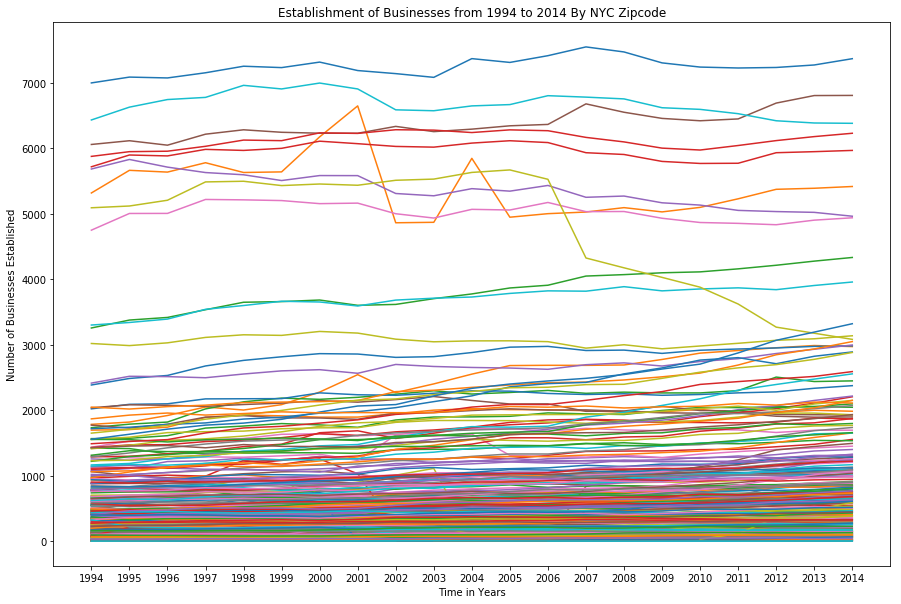

In [347]:
plt.figure(figsize=(15,10))

for index, row in yearsData.iterrows():
    plt.plot(yearsData.loc[index])
    
plt.title('Establishment of Businesses from 1994 to 2014 By NYC Zipcode')
plt.xlabel('Time in Years')
plt.ylabel('Number of Businesses Established')
xticks(np.arange(1994, 2015, step=1))
plt.savefig("nonnormalized.png")
plt.show;

**Figure 3.2**: Plot number of business establishments for each NYC zipcode from 1994 to 2014. Each different color line represents a different zipcode. A legend was not included because it does not add any actual value and is visually obtrusive. Right now, it's hard to differentiate between the different zipcodes, but we will fix that.

### Plot Normalized Time Series for Each Zipcode
The previous plot was too busy and didn't really give us any information. Moreover, we're looking for change and not absolute number. Thus, we want to normalize the data. This will allow us to see change in standard deviations from the yearly mean. 

In [76]:
arrayData = yearsData.as_matrix()
arrayData[isnan(arrayData)] = 0

In [77]:
means = np.mean(arrayData, axis=1)
stds = np.std(arrayData, axis=1)

for index, value in np.ndenumerate(arrayData):
    arrayData[index] = (value - means[index[1]]) / stds[index[1]]

In [78]:
flippedData = np.swapaxes(arrayData, 1, 0)
flippedData.shape

(21, 245)

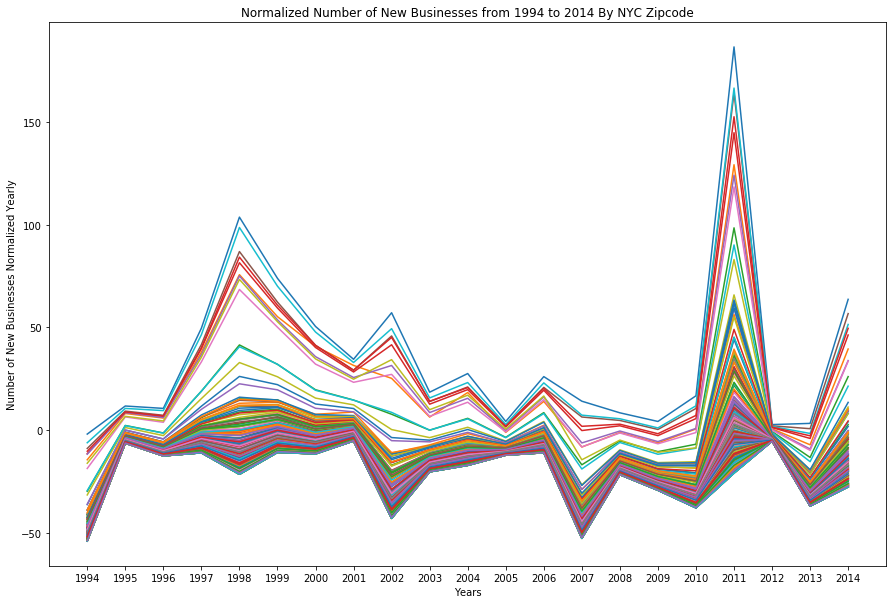

In [101]:
plt.figure(figsize=(15,10))
plt.plot(flippedData);
plt.title("Normalized Number of New Businesses from 1994 to 2014 By NYC Zipcode")
#plt.ylim(-.5, 1)
#plt.xlim(0,20)
plt.xlabel("Years")
xticks(np.arange(0, 21, step=1), np.arange(1994, 2015, step=1))
plt.ylabel("Number of New Businesses Normalized Yearly")
plt.savefig('normalized.png');

**Figure 3.3:** Plot of number of business establishments for each NYC zipcode from 1994 to 2014 normalized by year. We start to see several patterns emerging. Around the Dot Com Boom, we see some huge shifts upward with a few going down at the same time. After 9/11, we see a mirroring with some areas growing and a lot losing businesses. It is interesting to see that some areas grow while others shrink. Around 2010, we see radical growth, but only some areas grow tremendously while others grow slowly. We want to separate these different groups to see what's going on.

## Cluster Number of Establishments Using K Means
Cluster the number of establishments time series with K-means in **a few** clusters. We want to see groupings for specific patterns in the change of number of business openings or closings. 

### Seed for reproducibility

In [230]:
np.random.seed(888)

### Use Elbow Method to determine how many clusters to use

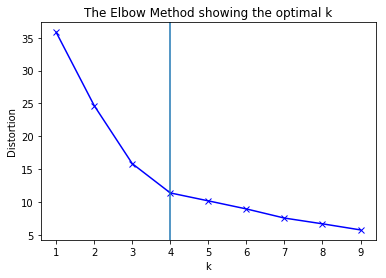

In [343]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = sklearn.cluster.KMeans(n_clusters=k).fit(arrayData)
    kmeanModel.fit(arrayData)
    distortions.append(sum(np.min(cdist(arrayData, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / arrayData.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(x=4)
plt.savefig("elbow.png")
plt.show()

### Seed the data for reproducibility & cluster the data

In [231]:
k = 4
kmeanModel = sklearn.cluster.KMeans(n_clusters=k).fit(arrayData)
kmeanModel.fit(arrayData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [232]:
kmeanModel.fit_predict(arrayData)

array([1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2,
       2, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3,
       3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 2, 3, 3, 3, 3, 3, 0, 2, 3, 2,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 0, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 0, 0, 0, 2, 2, 3, 3, 3, 0, 0, 3,
       0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 2, 3, 3, 2, 3, 3, 3, 2, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [237]:
lables = kmeanModel.fit_predict(arrayData)
yearsData['clusters'] = kmeanModel.labels_

### Plot each cluster over time to see each cluster's pattern of change

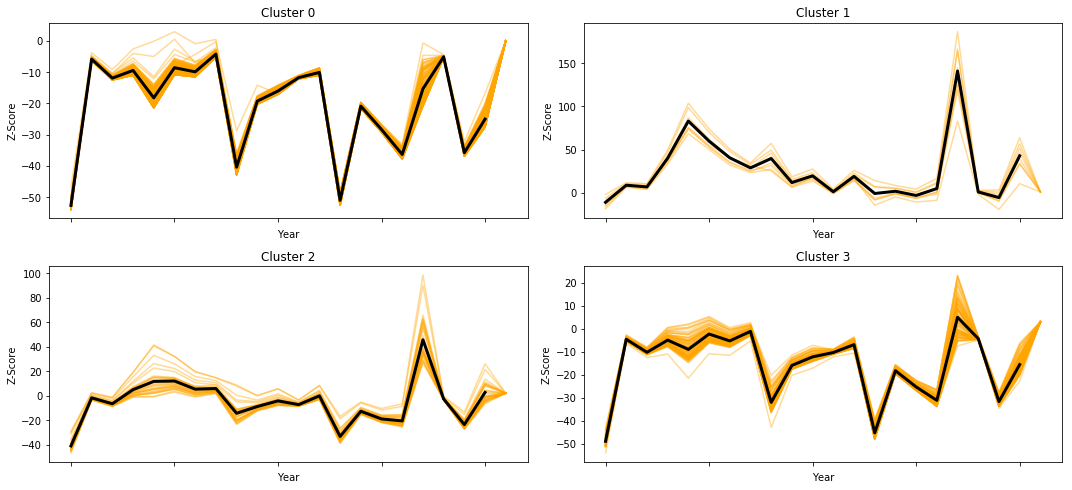

In [236]:
fig = plt.figure(figsize=[15,10])

for i in range(k):
    
    ax = fig.add_subplot(3,2,i + 1)
    yearsData[yearsData['clusters'] == i][:-1].transpose().plot(legend=False, 
                                                            ax=ax, 
                                                            color = 'orange', 
                                                            alpha = 0.4)
    
    plt.plot(yearsData.transpose()[:-1].index.astype(int)-1994, kmeanModel.cluster_centers_[i], 
             color='black', 
             linewidth=3)
    
    ax.set_title('Cluster ' + str(i))
    ax.set_xlabel('Year')
    ax.set_ylabel('Z-Score')
    
    plt.tight_layout()
    
    plt.savefig('clusters.png')

**Plot 4.2**: We see the four clusters. Cluster 0 and 3 have similar patterns while Cluster 1 and 2 have similar patterns. There however seems to be differences in intensity.

### Plot the mean of establishments by cluster group

In [238]:
flippedLabels = labels.reshape((1, 245))
clusteredData = numpy.append(flippedData, flippedLabels, axis = 0)
clusteredData.shape

(22, 245)

In [239]:
clusteredData = np.swapaxes(clusteredData, 1, 0)

In [240]:
clusteredData = pd.DataFrame(clusteredData)
clusteredData

cluster0 = clusteredData.loc[clusteredData[21]==0]
cluster1 = clusteredData.loc[clusteredData[21]==1]
cluster2 = clusteredData.loc[clusteredData[21]==2]
cluster3 = clusteredData.loc[clusteredData[21]==3]

In [241]:
cluster0Mean = cluster0.mean(axis=0)
cluster0Mean = cluster0Mean[:-1]
cluster0Mean
cluster0 = cluster0.iloc[:, :-1]


cluster1Mean = cluster1.mean(axis=0)
cluster1Mean = cluster1Mean[:-1]
cluster1Mean
cluster1 = cluster1.iloc[:, :-1]


cluster2Mean = cluster2.mean(axis=0)
cluster2Mean = cluster2Mean[:-1]
cluster2Mean
cluster2 = cluster2.iloc[:, :-1]

cluster3Mean = cluster3.mean(axis=0)
cluster3Mean = cluster3Mean[:-1]
cluster3Mean
cluster3 = cluster3.iloc[:, :-1]

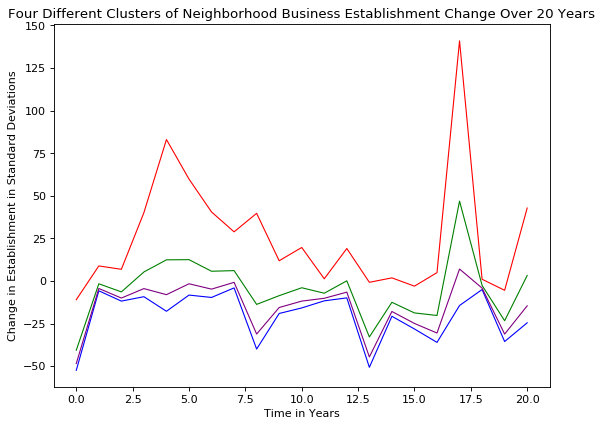

In [242]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster0Mean, color="blue", linewidth=1.0, linestyle="-");
plt.plot(cluster1Mean, color="green", linewidth=1.0, linestyle="-");
plt.plot(cluster2Mean, color="red", linewidth=1.0, linestyle="-");
plt.plot(cluster3Mean, color="purple", linewidth=1.0, linestyle="-");
plt.title("Four Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years")
plt.savefig("means1.png");

**Figure 4.3:** Plot of the 4 different clusters of neighborhood business establishment change over twenty years. 

## Cluster Number of Establishments Using Another Algorithm
Instead of K Means, let us use Agglomerative Clustering.

### Use Agglomerative Clustering

In [243]:
agglomModel = sklearn.cluster.AgglomerativeClustering(n_clusters=k).fit(arrayData)
agglomModel.fit(arrayData)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x7f0af4109950>)

In [244]:
agglomModel.fit_predict(arrayData)

array([0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2,
       2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3,
       3, 3, 3])

In [274]:
labels1 = agglomModel.fit_predict(arrayData)
yearsData1 = yearsData
yearsData1['clusters'] = agglomModel.labels_

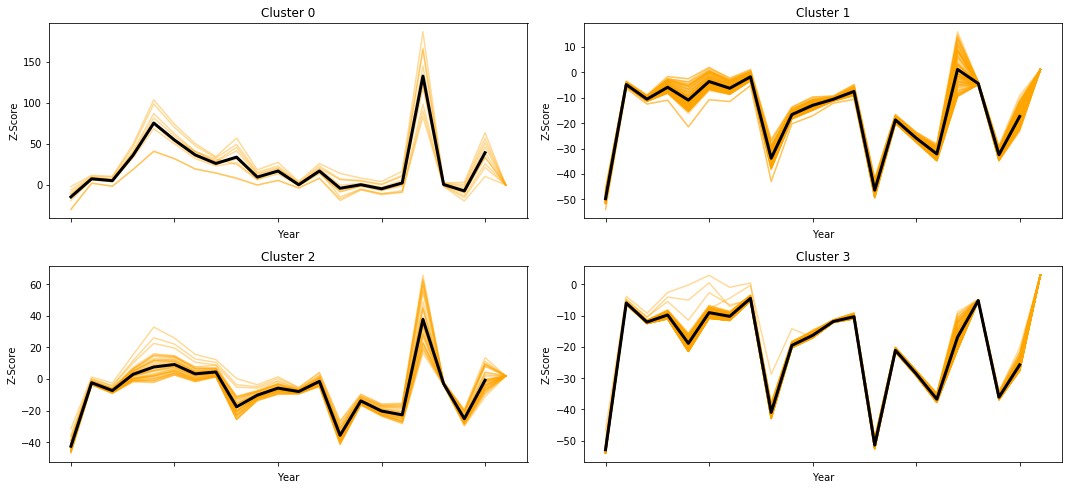

In [302]:
fig = plt.figure(figsize=[15,10])

for i in range(k):
    
    ax = fig.add_subplot(3,2,i + 1)
    yearsData1[yearsData1['clusters'] == i][:-1].transpose().plot(legend=False, 
                                                            ax=ax, 
                                                            color = 'orange', 
                                                            alpha = 0.4)
    
    plt.plot(yearsData1.transpose()[:-1].index.astype(int)-1994,  yearsData1[yearsData1['clusters'] == i].drop("clusters", axis = 1).mean(), 
             color='black', 
             linewidth=3)
    
    ax.set_title('Cluster ' + str(i))
    ax.set_xlabel('Year')
    ax.set_ylabel('Z-Score')
    
    plt.tight_layout()
    
    plt.savefig('clusters1.png')

### Plot the centers of each cluster

In [303]:
flippedLabels1 = labels1.reshape((1, 245))
clusteredData1 = numpy.append(flippedData, flippedLabels1, axis = 0)
clusteredData1.shape

(22, 245)

In [304]:
clusteredData1 = np.swapaxes(clusteredData1, 1, 0)

In [305]:
clusteredData1 = pd.DataFrame(clusteredData1)

In [306]:
cluster01 = clusteredData1.loc[clusteredData1[21]==0]
cluster11 = clusteredData1.loc[clusteredData1[21]==1]
cluster21 = clusteredData1.loc[clusteredData1[21]==2]
cluster31 = clusteredData1.loc[clusteredData1[21]==3]

In [307]:
cluster01Mean = cluster01.mean(axis=0)
cluster01Mean = cluster01Mean[:-1]
cluster01Mean

cluster01 = cluster01.iloc[:, :-1]

cluster11Mean = cluster11.mean(axis=0)
cluster11Mean = cluster11Mean[:-1]
cluster11Mean

cluster11 = cluster11.iloc[:, :-1]

cluster21Mean = cluster21.mean(axis=0)
cluster21Mean = cluster21Mean[:-1]
cluster21Mean

cluster21 = cluster21.iloc[:, :-1]

cluster31Mean = cluster31.mean(axis=0)
cluster31Mean = cluster31Mean[:-1]
cluster31Mean

cluster31 = cluster31.iloc[:, :-1]

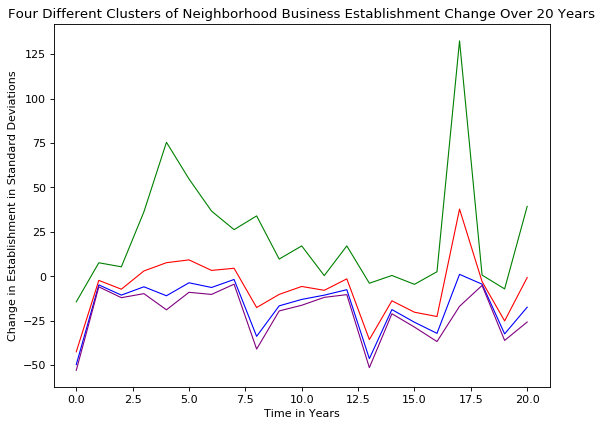

In [308]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster01Mean, color="green", linewidth=1.0, linestyle="-");
plt.plot(cluster11Mean, color="blue", linewidth=1.0, linestyle="-");
plt.plot(cluster21Mean, color="red", linewidth=1.0, linestyle="-");
plt.plot(cluster31Mean, color="purple", linewidth=1.0, linestyle="-");
plt.title("Four Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years")
plt.savefig("means2.png");

**Figure 5.2:** Clustering using Agglomerative Clustering rather than K Means

## Compare Algorithms
Compare the results of the 2 algorithms.

In [309]:
labels

array([2, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1,
       1, 0, 3, 1, 3, 0, 3, 3, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 3, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3,
       3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 3, 3, 0, 3, 3, 0, 1, 3, 1,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 0, 3, 1, 3, 0, 3,
       3, 1, 1, 3, 3, 0, 1, 1, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 3,
       0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [310]:
labels1

array([0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2,
       2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 2, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3,
       3, 3, 3])

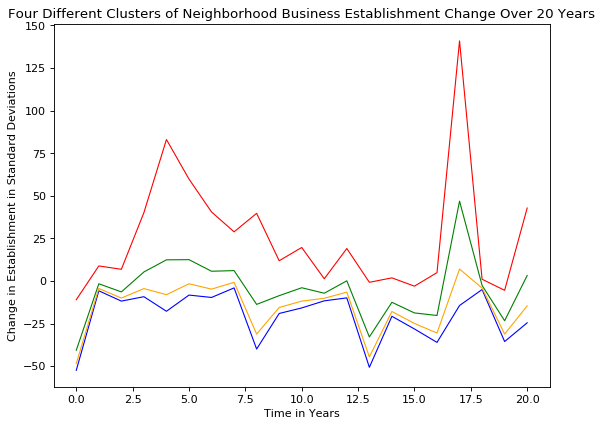

In [321]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster0Mean, color="blue", linewidth=1.0, linestyle="-");
plt.plot(cluster1Mean, color="green", linewidth=1.0, linestyle="-");
plt.plot(cluster2Mean, color="red", linewidth=1.0, linestyle="-");
plt.plot(cluster3Mean, color="orange", linewidth=1.0, linestyle="-");
plt.title("Four Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

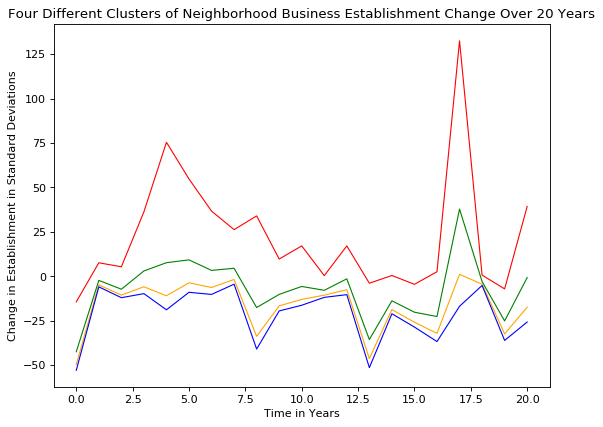

In [322]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster01Mean, color="red", linewidth=1.0, linestyle="-");
plt.plot(cluster11Mean, color="orange", linewidth=1.0, linestyle="-");
plt.plot(cluster21Mean, color="green", linewidth=1.0, linestyle="-");
plt.plot(cluster31Mean, color="blue", linewidth=1.0, linestyle="-");
plt.title("Four Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years");

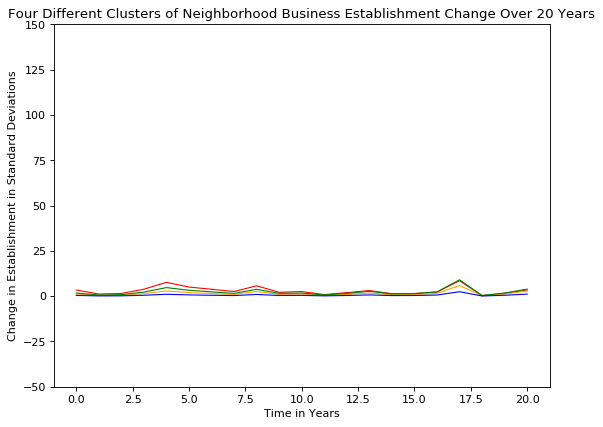

In [344]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(abs(cluster01Mean - cluster2Mean), color="red", linewidth=1.0, linestyle="-");
plt.plot(abs(cluster11Mean - cluster3Mean), color="orange", linewidth=1.0, linestyle="-");
plt.plot(abs(cluster21Mean - cluster1Mean), color="green", linewidth=1.0, linestyle="-");
plt.plot(abs(cluster31Mean - cluster0Mean), color="blue", linewidth=1.0, linestyle="-");
plt.ylim(-50,150)
plt.title("Four Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years")
plt.savefig("difference.png");

## Overlay Clusters Onto Map of NYC
Seeing clusters of different patterns of business establishment is only helpful if we see it geospatially. Let us map each zipcode creating a choropleth by cluster. This should reveal if there is a pattern. 

In [317]:
nycZipcodes = gpd.GeoDataFrame.from_file("ZIP_CODE_040114.shp")

In [318]:
mergedDF = pd.DataFrame(yearsData['clusters'])
mergedDF['ZIPCODE'] = mergedDF.index

In [319]:
nycZipcodes['ZIPCODE'] = nycZipcodes['ZIPCODE'].astype(int)
nycZipcodes = nycZipcodes.merge(mergedDF, how='left')
nycZipcodes['clusters'] = nycZipcodes['clusters'].astype(str)

No handles with labels found to put in legend.


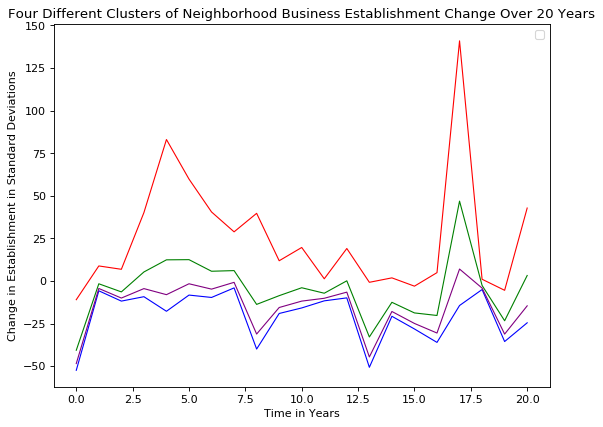

In [338]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(cluster0Mean, color="blue", linewidth=1.0, linestyle="-");
plt.plot(cluster1Mean, color="green", linewidth=1.0, linestyle="-");
plt.plot(cluster2Mean, color="red", linewidth=1.0, linestyle="-");
plt.plot(cluster3Mean, color="purple", linewidth=1.0, linestyle="-");
plt.title("Four Different Clusters of Neighborhood Business Establishment Change Over 20 Years")
plt.ylabel("Change in Establishment in Standard Deviations")
plt.xlabel("Time in Years")
plt.savefig("means1.png");

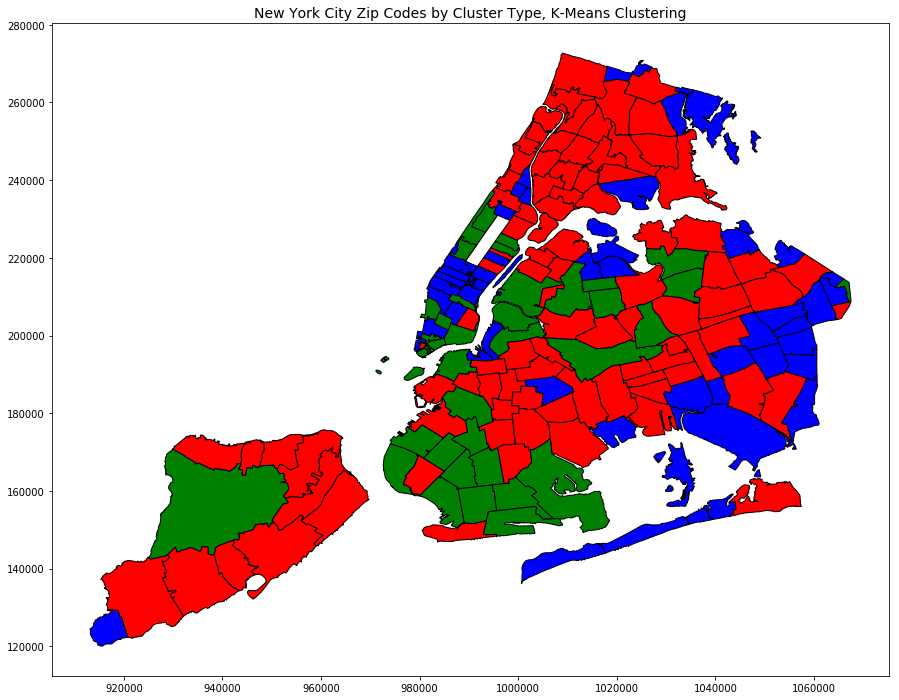

In [355]:
cmap = matplotlib.colors.ListedColormap(["blue","red","green", "blue", "white"])

#2 is 0
#1 is 2

fig, ax = plt.subplots(figsize=(15,12))
nycZipcodes.plot(column='clusters', 
                 edgecolor='black', 
                 cmap=cmap, 
                 ax=ax)
ax.set_title('New York City Zip Codes by Cluster Type, K-Means Clustering', 
             fontsize=14)

fig.savefig("map.png")